# Breast Cancer Detection With Ultrasound Images

Using CNN Deep Neural Network

## About the Dataset

This dataset consists of ultrasound images related to benign and malignant breast cancers.

The images have been augmented by rotation and sharpening to produce sufficient amount of images.

## Importing the Data

### Determine all the images filepaths 

In [1]:
import os

def _get_all_filepath_from_folder(folder_filepath: str) -> list[str]:
    all_filepath: list[str] = []
    for curr_filename in os.listdir(folder_filepath):
        full_path = os.path.join(folder_filepath, curr_filename)
        if os.path.exists(full_path):
            all_filepath.append(full_path)

    return all_filepath

train_benign = f"../assets/ultrasound breast classification/train/benign"
train_malignant = f"../assets/ultrasound breast classification/train/malignant"
test_benign = f"../assets/ultrasound breast classification/val/benign"
test_malignant = f"../assets/ultrasound breast classification/val/malignant"

# make a list of all the filepath for train+benign
all_train_benign_filepath    = _get_all_filepath_from_folder(train_benign)
all_train_malignant_filepath = _get_all_filepath_from_folder(train_malignant)
all_test_benign_filepath     = _get_all_filepath_from_folder(test_benign)
all_test_malignant_filepath  = _get_all_filepath_from_folder(test_malignant)

print(f"all_train_benign_filepath    {len(all_train_benign_filepath)}")
print(f"all_train_malignant_filepath {len(all_train_malignant_filepath)}")
print(f"all_test_benign_filepath     {len(all_test_benign_filepath)}")
print(f"all_test_malignant_filepath  {len(all_test_malignant_filepath)}")

all_train_benign_filepath    4074
all_train_malignant_filepath 4042
all_test_benign_filepath     500
all_test_malignant_filepath  400


### Build train/test DataFrames

In [2]:
# we use "zip()" to merge 2 lists into 1 list of a tuple with 2 elements
columns_train_benign     = list(zip(all_train_benign_filepath, [0] * len(all_train_benign_filepath)))
columns_train_malignant  = list(zip(all_train_malignant_filepath, [1] * len(all_train_malignant_filepath)))
columns_test_benign      = list(zip(all_test_benign_filepath, [0] * len(all_test_benign_filepath)))
columns_test_malignant   = list(zip(all_test_malignant_filepath, [1] * len(all_test_malignant_filepath)))

# merging the benign/malignant lists into 1 list
columns_train_all = columns_train_benign + columns_train_malignant
columns_test_all = columns_test_benign + columns_test_malignant

import pandas as pd

# here we create the train/test dataframes
train_df = pd.DataFrame(columns_train_all, columns=['filepath', 'is_malignant'])
test_df = pd.DataFrame(columns_test_all, columns=['filepath', 'is_malignant'])

In [3]:
print('train_df.info()')
print(train_df.info())

train_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filepath      8116 non-null   object
 1   is_malignant  8116 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 126.9+ KB
None


In [4]:
print('test_df.info()')
print(test_df.info())

test_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filepath      900 non-null    object
 1   is_malignant  900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB
None


In [5]:
print('train_df')
print(train_df)

train_df
                                               filepath  is_malignant
0     ../assets/ultrasound breast classification/tra...             0
1     ../assets/ultrasound breast classification/tra...             0
2     ../assets/ultrasound breast classification/tra...             0
3     ../assets/ultrasound breast classification/tra...             0
4     ../assets/ultrasound breast classification/tra...             0
...                                                 ...           ...
8111  ../assets/ultrasound breast classification/tra...             1
8112  ../assets/ultrasound breast classification/tra...             1
8113  ../assets/ultrasound breast classification/tra...             1
8114  ../assets/ultrasound breast classification/tra...             1
8115  ../assets/ultrasound breast classification/tra...             1

[8116 rows x 2 columns]


In [6]:
print('test_df')
print(test_df)

test_df
                                              filepath  is_malignant
0    ../assets/ultrasound breast classification/val...             0
1    ../assets/ultrasound breast classification/val...             0
2    ../assets/ultrasound breast classification/val...             0
3    ../assets/ultrasound breast classification/val...             0
4    ../assets/ultrasound breast classification/val...             0
..                                                 ...           ...
895  ../assets/ultrasound breast classification/val...             1
896  ../assets/ultrasound breast classification/val...             1
897  ../assets/ultrasound breast classification/val...             1
898  ../assets/ultrasound breast classification/val...             1
899  ../assets/ultrasound breast classification/val...             1

[900 rows x 2 columns]


Here we shuffle the Data frames
* Otherwise all the benign values are at the start and all the malignant values at the end
* Here we use the random_state parameter to keep it deterministic between each launch

In [7]:
train_df = train_df.sample(frac=1, random_state=0).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=0).reset_index(drop=True)

In [8]:
print('train_df')
print(train_df)

train_df
                                               filepath  is_malignant
0     ../assets/ultrasound breast classification/tra...             0
1     ../assets/ultrasound breast classification/tra...             1
2     ../assets/ultrasound breast classification/tra...             0
3     ../assets/ultrasound breast classification/tra...             1
4     ../assets/ultrasound breast classification/tra...             0
...                                                 ...           ...
8111  ../assets/ultrasound breast classification/tra...             1
8112  ../assets/ultrasound breast classification/tra...             0
8113  ../assets/ultrasound breast classification/tra...             0
8114  ../assets/ultrasound breast classification/tra...             0
8115  ../assets/ultrasound breast classification/tra...             0

[8116 rows x 2 columns]


In [9]:
print('test_df')
print(test_df)

test_df
                                              filepath  is_malignant
0    ../assets/ultrasound breast classification/val...             0
1    ../assets/ultrasound breast classification/val...             0
2    ../assets/ultrasound breast classification/val...             0
3    ../assets/ultrasound breast classification/val...             0
4    ../assets/ultrasound breast classification/val...             1
..                                                 ...           ...
895  ../assets/ultrasound breast classification/val...             1
896  ../assets/ultrasound breast classification/val...             0
897  ../assets/ultrasound breast classification/val...             1
898  ../assets/ultrasound breast classification/val...             1
899  ../assets/ultrasound breast classification/val...             1

[900 rows x 2 columns]


**Conclusion:** the data is now shuffled and can be safely used.

In [10]:
import tensorflow as tf

In [11]:
import numpy as np

img_square_size = 128

# will map the images filepath with their loaded images data
def _get_img_filepath_to_map(all_filepaths: list[str]) -> dict[str, np.ndarray]:

  total = len(all_filepaths)

  img_filepath_map: dict[str, np.ndarray] = {}

  for index, curr_filepath in enumerate(all_filepaths):

    # small feedback of how far in the list we currently are
    if index > 0 and index % 1000 == 0:
      print(f" -> loading images -> progress: {index}/{total} ({(index / total) * 100.0:.0f}%)")

    # load the image -> https://keras.io/api/data_loading/image/
    loaded_img_data = tf.keras.utils.load_img(
      curr_filepath,
      color_mode="rgb",
      target_size=(img_square_size, img_square_size), # <- will resize
      interpolation="nearest", # <- no aliasing when resized, not blurry
      keep_aspect_ratio=False,
    )

    # convert the colored image to gray scales
    greyed_img_data = tf.image.rgb_to_grayscale(loaded_img_data)

    # convert the image to an array that can be passed to a model
    matrix_img_data = tf.keras.utils.img_to_array(greyed_img_data)

    # save the loaded image data against it's filepath
    img_filepath_map[curr_filepath] = matrix_img_data

  return img_filepath_map

print(f"loading + mapping the image data against their filepath")

all_filepath_img_data_map: dict[str, np.ndarray] = {}

to_load = [
  ('all_train_benign', all_train_benign_filepath),
  ('all_train_malignant', all_train_malignant_filepath),
  ('all_test_benign', all_test_benign_filepath),
  ('all_test_malignant', all_test_malignant_filepath)
]
for list_name, curr_list in to_load:
  print(f"starting list: '{list_name}'")

  new_dict_of_img_data = _get_img_filepath_to_map(curr_list)
  print(f" ---> newly loaded images done: {len(new_dict_of_img_data)}")

  # add the new dict of loaded images to the main dict 
  all_filepath_img_data_map |= new_dict_of_img_data
  print(f" -----> total loaded images so far: {len(all_filepath_img_data_map)}")

print('All Done!')
print('all_filepath_img_data_map  ->', len(all_filepath_img_data_map))

loading + mapping the image data against their filepath
starting list: 'all_train_benign'
 -> loading images -> progress: 1000/4074 (25%)
 -> loading images -> progress: 2000/4074 (49%)
 -> loading images -> progress: 3000/4074 (74%)
 -> loading images -> progress: 4000/4074 (98%)
 ---> newly loaded images done: 4074
 -----> total loaded images so far: 4074
starting list: 'all_train_malignant'
 -> loading images -> progress: 1000/4042 (25%)
 -> loading images -> progress: 2000/4042 (49%)
 -> loading images -> progress: 3000/4042 (74%)
 -> loading images -> progress: 4000/4042 (99%)
 ---> newly loaded images done: 4042
 -----> total loaded images so far: 8116
starting list: 'all_test_benign'
 ---> newly loaded images done: 500
 -----> total loaded images so far: 8616
starting list: 'all_test_malignant'
 ---> newly loaded images done: 400
 -----> total loaded images so far: 9016
All Done!
all_filepath_img_data_map  -> 9016


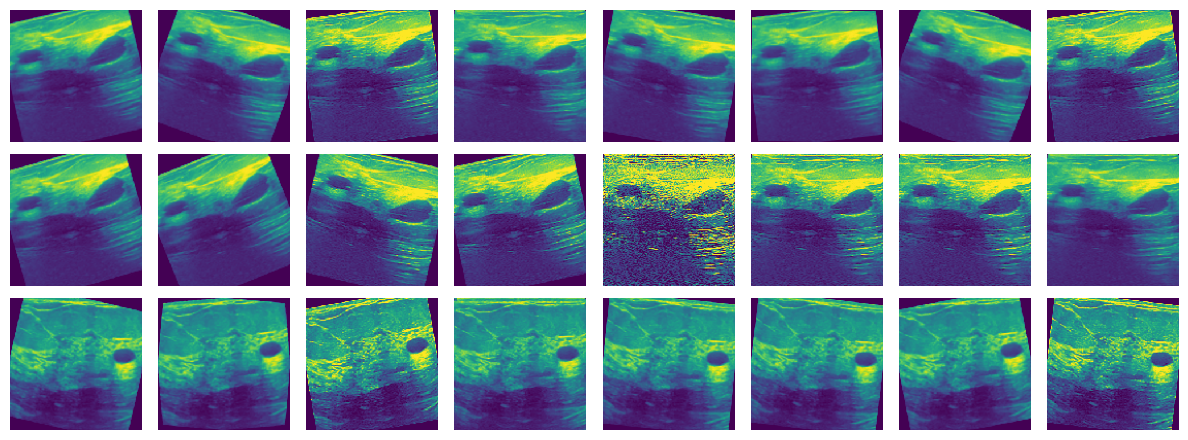

In [12]:
# some debug (benign)
import matplotlib.pyplot as plt

size=1.5
nrows=3
ncols=8

plt.subplots(nrows, ncols, figsize=(ncols*size, nrows*size))

for ii in range(0, nrows * ncols):
  plt.subplot(nrows, ncols, 1 + ii)
  plt.imshow(all_filepath_img_data_map[all_train_benign_filepath[ii]])
  plt.axis('off')

plt.tight_layout()
plt.savefig('img-breast-cancer-benign.png')

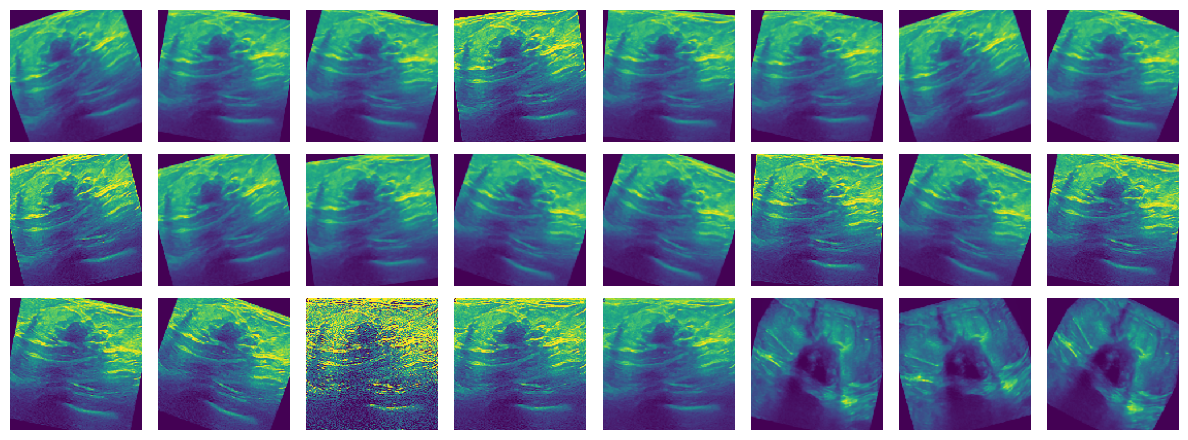

In [13]:
# some debug (malignant)
import matplotlib.pyplot as plt

size=1.5
nrows=3
ncols=8

plt.subplots(nrows, ncols, figsize=(ncols*size, nrows*size))

for ii in range(0, nrows * ncols):
  plt.subplot(nrows, ncols, 1 + ii)
  plt.imshow(all_filepath_img_data_map[all_train_malignant_filepath[ii]])
  plt.axis('off')

plt.tight_layout()
plt.savefig('img-breast-cancer-malignant.png')

In [14]:
# get the list of image data (train)
X_train = np.array(list(map(lambda curr_filepath: all_filepath_img_data_map.get(curr_filepath), train_df['filepath'])))
print('X_train.shape', X_train.shape)

X_train.shape (8116, 128, 128, 1)


In [15]:
# get the list of is_malignant values (train)
y_train = np.array(train_df['is_malignant'])
print('y_train.shape', y_train.shape)

y_train.shape (8116,)


In [16]:
# get the list of image data (test)
X_test = np.array(list(map(lambda curr_filepath: all_filepath_img_data_map.get(curr_filepath), test_df['filepath'])))
print('X_test.shape', X_test.shape)

X_test.shape (900, 128, 128, 1)


In [17]:
# get the list of is_malignant values (test)
y_test = np.array(test_df['is_malignant'])
print('y_test.shape', y_test.shape)

y_test.shape (900,)


## Classification

the neural network topology was decided using keras_tuner

[link to keras_tuner jupyter notebook](https://github.com/ZahraSarrafi/machine-learning-projects/blob/main/projects/Breast-Cancer-CNN/src/notebook-tuner-version.ipynb)


In [ ]:
model_filepath = "./my-saved-deep-learning-model-b128.keras"

from pathlib import Path

model_file = Path(model_filepath)
if model_file.exists() and model_file.is_file():

  print("model file was found")
  print("reusing previously trained model")

  my_model = tf.keras.models.load_model(model_filepath)
  my_model.summary()

else:

  print("model file was not found")
  print("training new model")

  my_model = tf.keras.models.Sequential()
  my_model.add(tf.keras.layers.Input((img_square_size, img_square_size,1)))

  for i in range(4):
    total_units = (i + 1) * 32 # 32, 64, 96, 128
    # convolution layer 128x128, 64x64, 32x32, 16x16
    my_model.add(tf.keras.layers.Conv2D(total_units, kernel_size=(3, 3), activation='leaky_relu', padding='same'))
    my_model.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))
    my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

  # now switch to one dense layer
  my_model.add(tf.keras.layers.Flatten())

  for i in range(4):
    my_model.add(tf.keras.layers.Dense(32, activation='relu'))
    my_model.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))

  my_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  my_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

  my_model.summary()

  epochs = 20

  early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',

    # here "patience" is the same as "epoch"
    # -> we're just after the 'restore_best_weights' feature
    patience=epochs,

    restore_best_weights=True,
    verbose=1
  )

  my_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1,
  )

  # Save the model
  my_model.save(model_filepath)

model file was not found
training new model


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,305 (1.72 MB)

 Trainable params: 450,305 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 680ms/step - accuracy: 0.6212 - loss: 1.1979 - val_accuracy: 0.8433 - val_loss: 0.4207
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 703ms/step - accuracy: 0.8091 - loss: 0.3967 - val_accuracy: 0.7222 - val_loss: 0.5921
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 704ms/step - accuracy: 0.8546 - loss: 0.3178 - val_accuracy: 0.8922 - val_loss: 0.3474
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 715ms/step - accuracy: 0.9376 - loss: 0.1533 - val_accuracy: 0.9178 - val_loss: 0.2328
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 724ms/step - accuracy: 0.9712 - loss: 0.0742 - val_accuracy: 0.9133 - val_loss: 0.4030
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 47s 741ms/step - accuracy: 0.9770 - loss: 0.0640 - val_accuracy: 0.8922 - val_loss: 0.5692
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 49s 766ms/step - accuracy: 0.9896 - loss: 0.0302 - val_accuracy: 0.9244 - val_loss: 0.3616
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 783ms/step - accuracy: 0.9842 - loss: 0.0449 - val_accu

In [24]:
y_pred = my_model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix", cm)
print(f" -> is not malignant prediction")
print(f"   -> correct   {cm[0][0]}")
print(f"   -> incorrect {cm[1][0]}")
print(f" -> is malignant prediction")
print(f"   -> correct   {cm[1][1]}")
print(f"   -> incorrect {cm[0][1]}")

print("accuracy_score", accuracy_score(y_test, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
confusion matrix [[444  56]
 [  2 398]]
 -> is not malignant prediction
   -> correct   444
   -> incorrect 2
 -> is malignant prediction
   -> correct   398
   -> incorrect 56
accuracy_score 0.9355555555555556


Text(0.5, 1.0, 'Confusion Matrix')

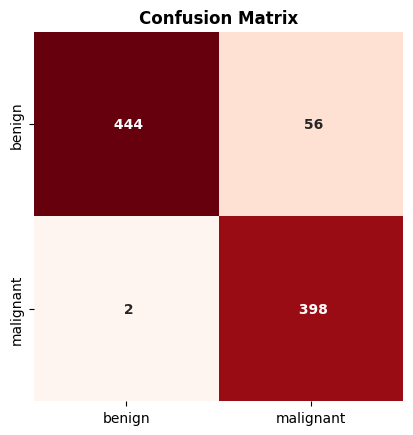

In [25]:
import seaborn as sns

labels = ['benign', 'malignant']
sns.heatmap(
    cm,
    cmap="Reds", annot=True, annot_kws={'fontweight':'bold'},
    fmt=" ", square=True, cbar=False,
    xticklabels=labels, yticklabels=labels
)
plt.title(
    "Confusion Matrix",
    fontsize=12,
    fontweight="bold",
    color="black"
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


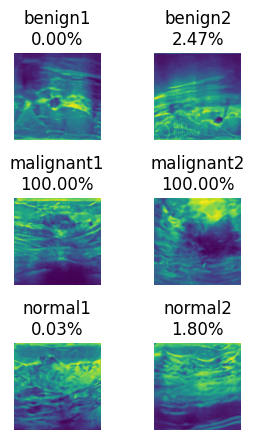

In [26]:
# list of paired "friendly name" + "filepath" in a tuple
all_paired_images: list[tuple[str,str]] = [
  ("benign1", "../assets/custom-test-asset/image-benign1.png"),
  ("benign2", "../assets/custom-test-asset/image-benign2.png"),
  ("malignant1", "../assets/custom-test-asset/image-malignant1.png"),
  ("malignant2", "../assets/custom-test-asset/image-malignant2.png"),
  ("normal1", "../assets/custom-test-asset/image-normal1.png"),
  ("normal2", "../assets/custom-test-asset/image-normal2.png"),
]

new_image_map: dict[str, np.ndarray] = {} # new loaded image map

for curr_pair in all_paired_images:
  new_image_map |= _get_img_filepath_to_map([curr_pair[1]]) # load one image file at a time

new_X = np.array(list(map(lambda curr_pair: new_image_map.get(curr_pair[1]), all_paired_images)))

new_y_pred = my_model.predict(new_X) # took 0.3sec to get here

size=1.5
nrows=3
ncols=2

plt.subplots(nrows, ncols, figsize=(ncols*size, nrows*size))

for index in range(0, nrows * ncols):

  curr_pair = all_paired_images[index]

  plt.subplot(nrows, ncols, 1 + index)
  plt.title(f"{curr_pair[0]}\n{new_y_pred[index][0] * 100:.2f}%")
  plt.imshow(new_image_map[curr_pair[1]])
  plt.axis('off')

plt.tight_layout() # took 0.7sec to get here